## Demographic Characteristics by Cluster
### Primary Author
Maia Guo

### Description:
This notebook plots the spatial clustering results and demograhic characteristics of each cluster, and compares the results of Scikit-learn and GeoDa KMeans. 

### Inputs:
cbg_attr_and_cluster_1021.csv

cbg_clusters_with_geoda.shp

nyc_cbgs.geojson

### Output:
Plots of clustering results on map and demographic characteristics.

In [1]:
import numpy as np
import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt 
import json
%pylab inline 
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Scikit-learn clustering result

In [2]:
df = pd.read_csv('/green-projects/project-usifood/workspace/share/data/processed/cbg_attr_and_cluster_1021.csv').set_index('census_block_group')
df.head()

,Median Esimated Visitor Count,Total Population,Percent Male,Median Age,Percent Two races excluding Some other race and three or more races,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,...,Percent Households with one or more people 60 years and over,Percent over 25 without a high school diploma,Percent over 25 with a bachelor’s degree or higher,Percent Households Income in the past 12 months below poverty level,Median Household Income,Percent Household received Food Stamps/SNAP,Percent Households received Food Stamps/SNAP have disability,Percent Employed,Percent Civilian labor force,Cluster
census_block_group,,,,,,,,,,,,,,,,,,,,,
360050001001,226.924590,6864,0.924388,35.0,0.015006,0.325321,0.557110,0.002622,0.0,0.073572,...,NaN,0.515975,0.014873,NaN,NaN,NaN,NaN,NaN,0.000000,2
360050002001,15.659303,1744,0.444381,40.2,0.014908,0.460436,0.331422,0.000000,0.0,0.193234,...,0.541304,0.246892,0.277975,0.326087,41968.0,0.334783,0.357143,0.762500,0.366972,2
360050002002,7.781848,1569,0.527725,28.9,0.013384,0.368388,0.291906,0.000000,0.0,0.281071,...,0.425577,0.243154,0.303395,0.144654,48523.0,0.190776,0.637363,0.860104,0.369025,2
360050002003,9.376958,1219,0.484003,42.2,0.043478,0.441345,0.274815,0.000000,0.0,0.178835,...,0.585185,0.137892,0.306054,0.024691,68060.0,0.108642,1.000000,0.985940,0.466776,3
360050004001,6.738028,598,0.548495,40.3,0.000000,0.707358,0.065217,0.000000,0.0,0.215719,...,0.492366,0.174731,0.206989,0.312977,NaN,0.095420,0.000000,1.000000,0.605351,3


In [4]:
cluster_cbg = df[['Cluster']].reset_index()
cluster_cbg.census_block_group = cluster_cbg.census_block_group.astype('str')
# cluster_cbg.census_block_group = cluster_cbg.census_block_group.astype('int64')
cluster_cbg.head()

,census_block_group,Cluster
0,360050001001,2
1,360050002001,2
2,360050002002,2
3,360050002003,3
4,360050004001,3


In [ ]:
cluster_cbg.shape

(6221, 2)

In [ ]:
cbg = gpd.read_file('/content/drive/MyDrive/SafeGraph/Data/nyc_cbgs.geojson')
cluster_geo = cluster_cbg.merge(cbg, left_on='census_block_group', right_on='CensusBlockGroup', how='outer')
cluster_geo = gpd.GeoDataFrame(cluster_geo)

In [ ]:
# function for visualizing communities 
from matplotlib.lines import Line2D 

def visualizePartitionShape(gdf, label, field_id, K, plttitle=''):
    
    fig, ax =  plt.subplots(figsize=(15, 15))
    cbg.boundary.plot(color='grey', alpha=0.1, ax=ax)
    colors=['pink','gold','teal','darkslateblue','tab:blue','tab:red','skyblue','tab:purple','gray','brown','seagreen','wheat']
#     colors = ['gold', 'darkslateblue', 'pink', 'teal'] # for GeoDa

    for c in range(K): # for each cluster
        gdf.geometry.loc[gdf[label]==c].plot(color=colors[c], ax=ax)
    
    count_cbg = gdf[[label, field_id]].groupby(label).count()
    legend_elements = [Line2D([0], [0], color='w', marker='o', label='Cluster %d: %d'%(i, count_cbg[field_id][i]), markersize=18, markerfacecolor=colors[i]) for i in range(K)]

    ax.set_axis_off()
    ax.legend(handles=legend_elements, title='Clusters & CBG num', title_fontsize=15, loc='upper left', fontsize=14, frameon=False, prop={'weight':'bold'}) #
    # plt.title(plttitle) 
    plt.show()

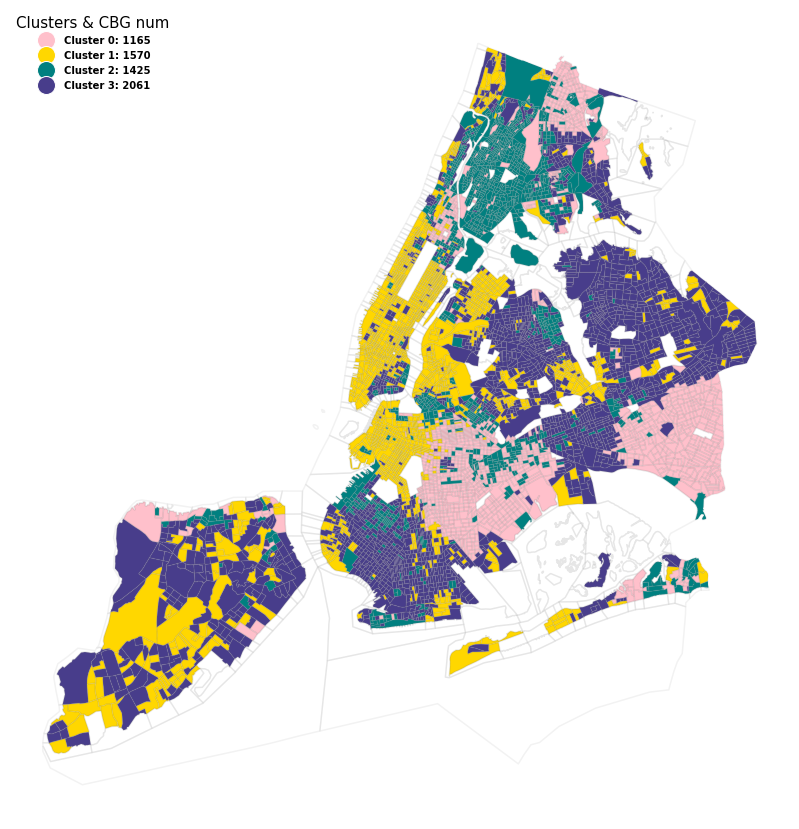

In [ ]:
visualizePartitionShape(cluster_geo, 'Cluster', 'census_block_group', 4)

## GeoDa clustering result

GeoDa KMeans Clustering: https://geodacenter.github.io/workbook/7b_clusters_2/lab7b.html#k-means

------
Method:	KMeans

Number of clusters:	4

Initialization method:	KMeans++

Initialization re-runs:	150

Maximum iterations:	1000

Transformation:	Standardize (Z)

Distance function:	Euclidean

Cluster centers:

    |  |PC1     |PC2      |PC3      |PC4      |PC5      |PC6      |PC7      |PC8       |PC9       |
    |--|--------|---------|---------|---------|---------|---------|---------|----------|----------|
    |C1|-1.93857|-0.119004|-0.223354|0.188267 |0.464754 |-0.382263|-0.025591|0.0808769 |0.140157  |
    |C2|1.41895 |-0.113288|0.184139 |0.902565 |-0.535351|0.0895608|0.0619271|0.0175816 |-0.22585  |
    |C3|1.1368  |0.385885 |0.0922826|-1.6986  |0.0251441|0.540452 |0.142153 |-0.0258875|0.106537  |
    |C4|1.51419 |-0.292606|0.52029  |-0.791036|-0.229289|-0.878215|-9.66777 |-7.05297  |-0.0612785|

The total sum of squares:	55980

Within-cluster sum of squares:

    |  |Within cluster S.S.|
    |--|-------------------|
    |C1|17372.4            |
    |C2|17240.3            |
    |C3|7029.55            |
    |C4|1179.48            |

The total within-cluster sum of squares:	42821.7

The between-cluster sum of squares:	13158.3

The ratio of between to total sum of squares:	0.235053



In [ ]:
cl_gd = gpd.read_file('/content/drive/MyDrive/SafeGraph/Data/GeoDa_result/cbg_clusters_with_geoda.shp')

In [ ]:
cl_gd.Cl_PCA_GD.unique()

array([2., 3., 1., 4.])

In [ ]:
for i in range(1, 5):
    for j in cl_gd[cl_gd.Cl_PCA_GD==i].index:
        cl_gd.Cl_PCA_GD[j] -= 1

In [ ]:
cl_gd.Cl_PCA_GD.unique()

array([1., 2., 0., 3.])

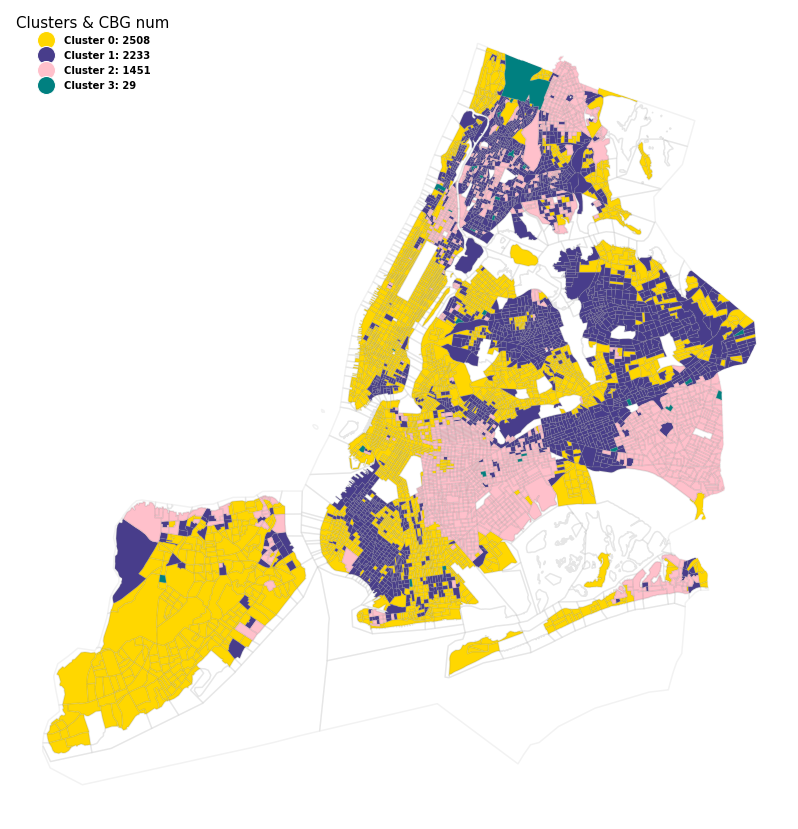

In [ ]:
# Cluster GeoDa
visualizePartitionShape(cl_gd, 'Cl_PCA_GD', 'BlockGroup', 4)

## Demographic Characteristics (sklearn KM VS GeoDa KM) 

In [7]:
df = pd.read_csv('/green-projects/project-usifood/workspace/share/data/processed/cbg_attr_and_cluster_1021.csv')

In [ ]:
df2 = gpd.read_file('/content/drive/MyDrive/SafeGraph/Data/GeoDa_result/cbg_for_cluster.shp')

In [ ]:
rename_dict = dict(zip(df2.columns[8:31],df.columns[1:24]))
rename_dict[df2.columns[4]] = df.columns[0]
df2 = df2.rename(columns=rename_dict)
# 1-4 to 0-3
for i in range(1, 5):
    for j in df2[df2.Cl_PCA_GD==i].index:
        df2.Cl_PCA_GD[j] = int(df2.Cl_PCA_GD[j]-1)

In [3]:
# recalculate attributes 
    # population: cbg_pct * cbg_pop / total_cluster_pop
    # households: cbg_pct * cbg_hhd / total_cluster_hhd 

def pct_calculator(raw_df, df_columns, denominator, cluster_name):
    df_pct = raw_df[df_columns+[cluster_name, denominator]]
    for i in df_columns:
        df_pct[i] = df_pct[i]*df_pct[denominator]
    for i in raw_df.Cluster.unique():
        df_pct = df_pct.groupby(cluster_name).sum()
    for i in df_columns:
        df_pct[i] = df_pct[i]/df_pct[denominator]
    df_pct = df_pct.drop(denominator, axis=1)
    return df_pct

In [4]:
def norm_cluster_attr(raw_df, cluster_name):
    
    median_col = [cluster_name, 'Median Esimated Visitor Count', 'Total Population',
              'Median Age', 'Total Households', 'Median Household Income']
    median_df = raw_df[median_col].groupby(cluster_name).median()
    
    pop_col =['Percent Male',
          'Percent over 25 without a high school diploma',
          'Percent over 25 with a bachelor’s degree or higher',
          'Percent Employed', 'Percent Civilian labor force']
    pop_attr = pct_calculator(raw_df, pop_col, 'Total Population', cluster_name)

    hhd_col = ['Percent Households with one or more people under 18 years',
              'Percent Households with one or more people 60 years and over',
              'Percent Households Income in the past 12 months below poverty level',
              'Percent Household received Food Stamps/SNAP',
              'Percent Households received Food Stamps/SNAP have disability']
    hhd_attr = pct_calculator(raw_df, hhd_col, 'Total Households', cluster_name)

    rc_col = ['Percent Two races excluding Some other race and three or more races',
      'Percent White alone', 'Percent Black or African American alone',
      'Percent American Indian and Alaska Native alone',
      'Percent Native Hawaiian and Other Pacific Islander alone',
      'Percent Some other race alone', 'Percent Two or more races',
      'Percent Asian alone & Two races including Some other race']
    rc = pct_calculator(raw_df, rc_col, 'Total Population', cluster_name) 

    sum_rc = np.sum(rc, axis=1)
    for i in rc.columns:
        rc[i] = rc[i]/sum_rc
    
    normed_attr = pd.concat([median_df, pop_attr, hhd_attr, rc], axis=1)
    
    return normed_attr

In [5]:
census_cluster = norm_cluster_attr(df, 'Cluster')

In [ ]:
census_cluster_gd = norm_cluster_attr(df2, 'Cl_PCA_GD')

In [ ]:
census_cluster.shape

(4, 23)

In [ ]:
census_cluster_gd.shape

(4, 23)

In [13]:
def show_plots(census_cluster):
    
    # population & education
    plt.figure(figsize=(8,6))
    census_cluster['Total Population'].plot.bar(label='Total Population')
    plt.plot(census_cluster['Percent over 25 without a high school diploma']*census_cluster['Total Population'], 'b^-', color='pink', label='Percent over 25 without a high school diploma')
    plt.plot(census_cluster['Percent over 25 with a bachelor’s degree or higher']*census_cluster['Total Population'], 'b^-', color='lightblue', label='Percent over 25 with a bachelor’s degree or higher')
    plt.title('Total Population and Education Level')
    plt.ylabel('Population (Weighted Average)')
    plt.xlabel('Clusters')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # labor force & employment
    plt.figure(figsize=(8,6))
    plt.bar(census_cluster.index, census_cluster['Percent Civilian labor force'], 0.75, color='lightblue', label='Civilian labor force')
    plt.bar(census_cluster.index, census_cluster['Percent Civilian labor force']*census_cluster['Percent Employed'], 0.75, color='darkblue', alpha=0.5, fill=False, hatch='///', label='Employed')
    plt.title('Civilian labor force and Employment')
    plt.ylabel('Percentage (Weighted Average)')
    plt.xlabel('Clusters')
    plt.legend()

    # gender ratio
    ratio = list(census_cluster['Percent Male']/(1-census_cluster['Percent Male']))
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(census_cluster.index, ratio, 0.5,  label='Gender Ratio', color='teal')
    ax.set_ylabel('Ratio (Male:Female)')
    ax.set_xlabel('Clusters')
    ax.set_title('Gender Ratio of Each Cluster')
    # ax.set_yticks(np.arange(0, 1.1, 0.1))
    # ax.legend()
    plt.show()

    # median age
    plt.figure(figsize=(8,6))
    census_cluster['Median Age'].plot.bar(color='teal')
    plt.title('Median Age of CBGs in Each Cluster')
    plt.ylabel('Age (Weighted Average)')
    plt.xlabel('Clusters')
    
    # median household income
    plt.figure(figsize=(8,6))
    census_cluster['Median Household Income'].plot.bar(color='darkslateblue')
    plt.title('Median Household Income of CBGs in Each Cluster')
    plt.ylabel('Income (Weighted Average)')
    plt.xlabel('Clusters')

    # food service & household types
    plt.figure(figsize=(8,6))
    plt.bar(census_cluster.index, census_cluster['Percent Household received Food Stamps/SNAP'], 0.75, color='teal', label='Percent Household received Food Stamps/SNAP')
    plt.bar(census_cluster.index, census_cluster['Percent Households received Food Stamps/SNAP have disability']*census_cluster['Percent Household received Food Stamps/SNAP'], 0.75, color='lightgrey', alpha=0.5, fill=False, hatch='///', label='Percent Households received Food Stamps/SNAP have disability')
    plt.plot(census_cluster['Percent Households with one or more people under 18 years'], 'b^-', color='pink', label='Percent Households with one or more people under 18 years')
    plt.plot(census_cluster['Percent Households with one or more people 60 years and over'], 'b^-', color='lightblue', label='Percent Households with one or more people 60 years and over')
    plt.plot(census_cluster['Percent Households Income in the past 12 months below poverty level'], 'b*-', color='gold', label='Percent Households Income in the past 12 months below poverty level')
    plt.title('Food Stamps/SNAP and Household Status')
    plt.ylabel('Percentage (Weighted Average)')
    plt.xlabel('Clusters')
    plt.xticks(range(4))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # race composition
    rc_col = ['Percent Two races excluding Some other race and three or more races',
              'Percent White alone', 'Percent Black or African American alone',
              'Percent American Indian and Alaska Native alone',
              'Percent Native Hawaiian and Other Pacific Islander alone',
              'Percent Some other race alone', 'Percent Two or more races',
              'Percent Asian alone & Two races including Some other race']
    rc = census_cluster[rc_col]
    plt.figure(figsize=(8,6))
    colors=['teal','gold','darkslateblue','skyblue','pink','tab:red','wheat','tab:blue','tab:purple','gray','brown','seagreen']
    for i in range(rc.shape[1]):
        if i == 0:
            plt.bar(rc.index, rc.iloc[:, i], width=0.75, color=colors[i], label=rc.columns[i])
        else:
            plt.bar(rc.index, rc.iloc[:, i], 
              bottom=np.sum(rc.iloc[:, :i], axis=1), width=0.75, color=colors[i], label=rc.columns[i])
    plt.xticks(rc.index)
    # plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Clusters")
    plt.ylabel('Percentage (Weighted Average)')
    plt.title('Race Composition of Each Cluster')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # estimated cisitor count
    plt.figure(figsize=(8,6))
    census_cluster['Median Esimated Visitor Count'].plot.bar()
    plt.xlabel("Clusters")
    plt.ylabel('Visitor Count (Median)')
    plt.title('Visitor Count of Each Cluster')

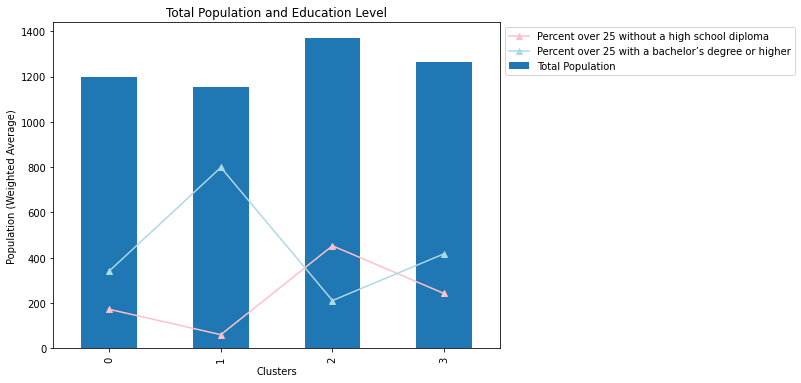

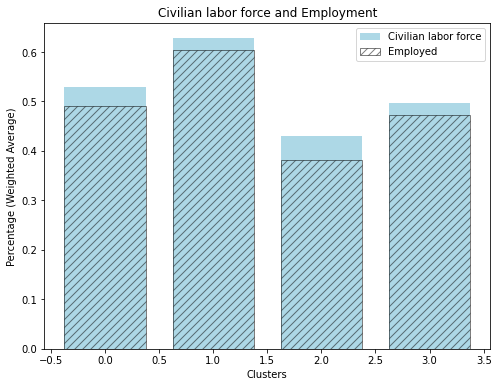

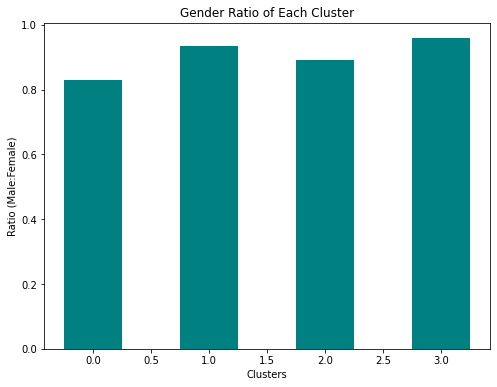

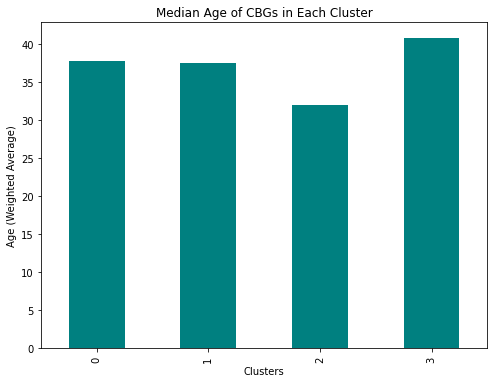

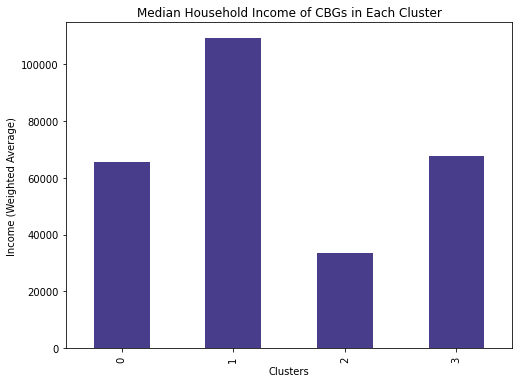

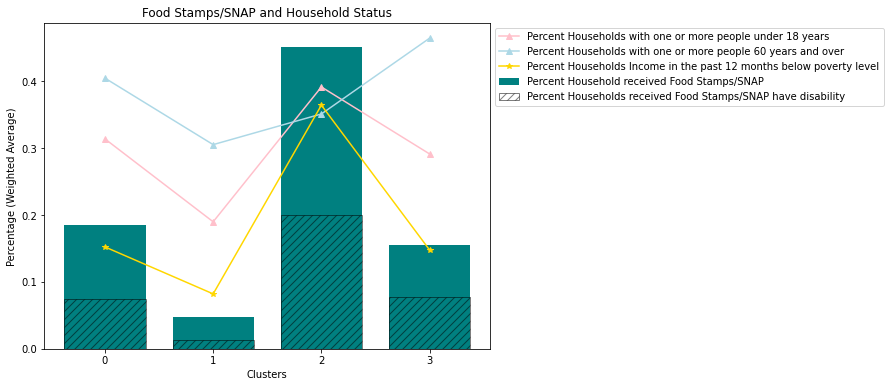

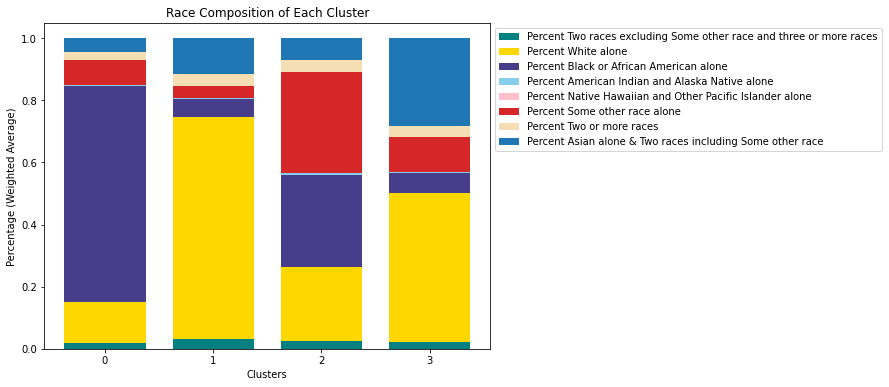

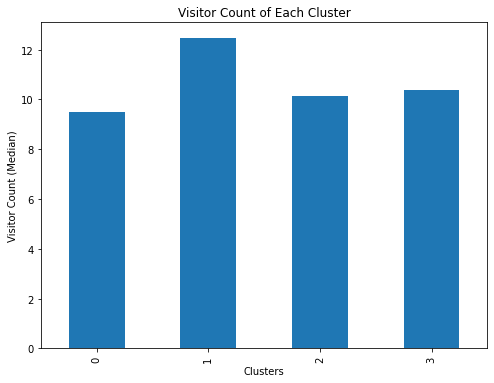

In [ ]:
# sklearn result
show_plots(census_cluster)

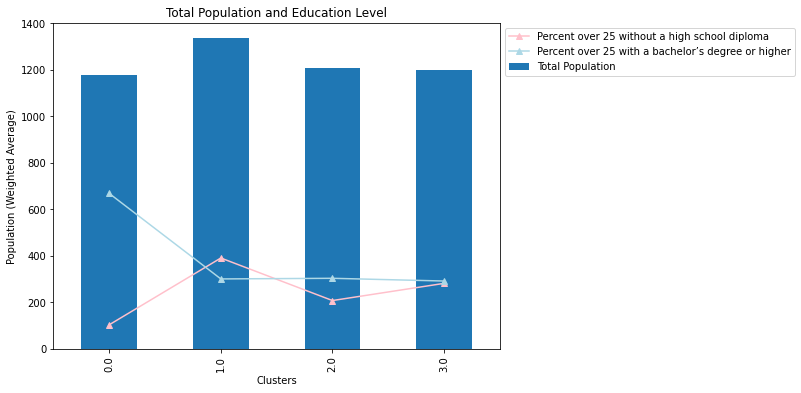

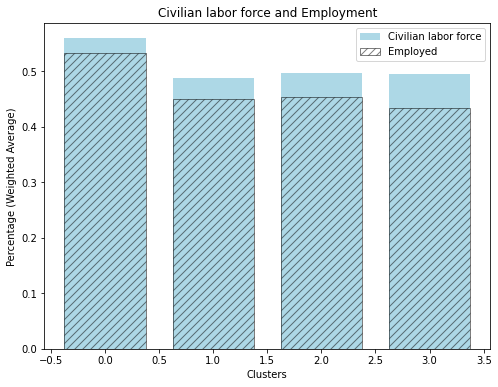

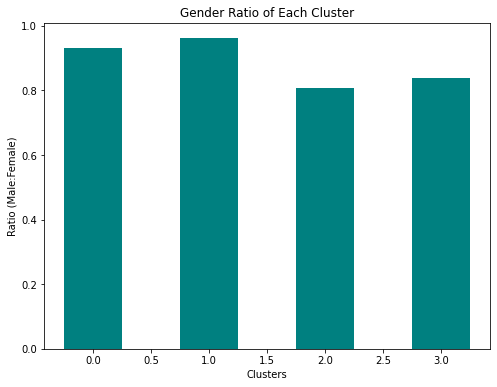

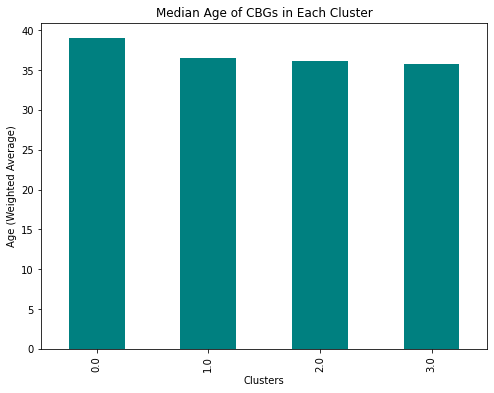

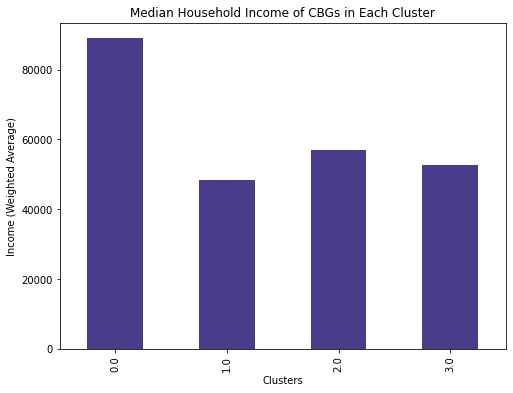

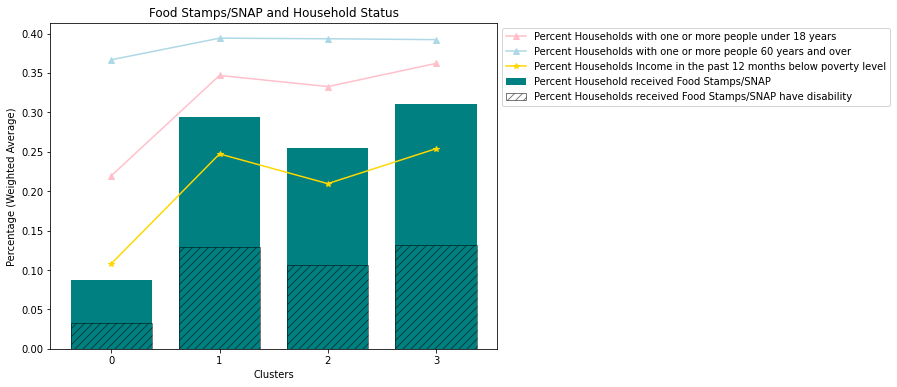

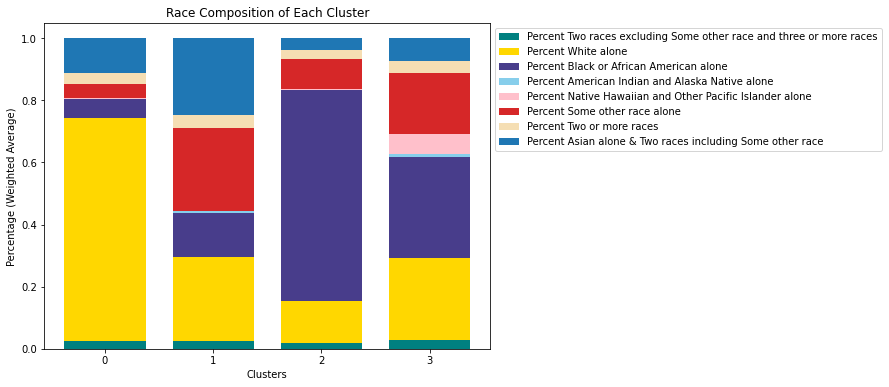

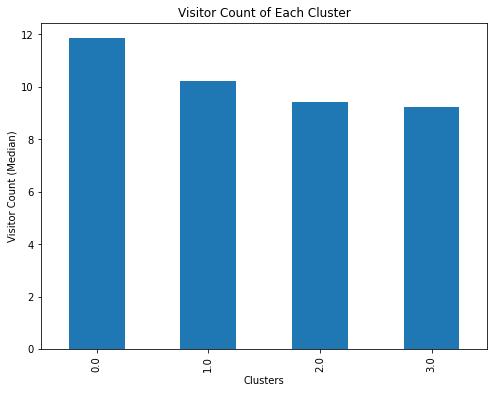

In [ ]:
# GeoDa result
show_plots(census_cluster_gd)

### Representative plots to be included in the report

In [6]:
# set the figure and font size
# import seaborn as sns 
import matplotlib.ticker as mtick
# sns.set(rc={"font.size":18, "axes.titlesize":18, "axes.labelsize":16}) # 'figure.figsize':(20, 8), 

Text(0.5, 1.0, 'Socioeconomic Characteristics')

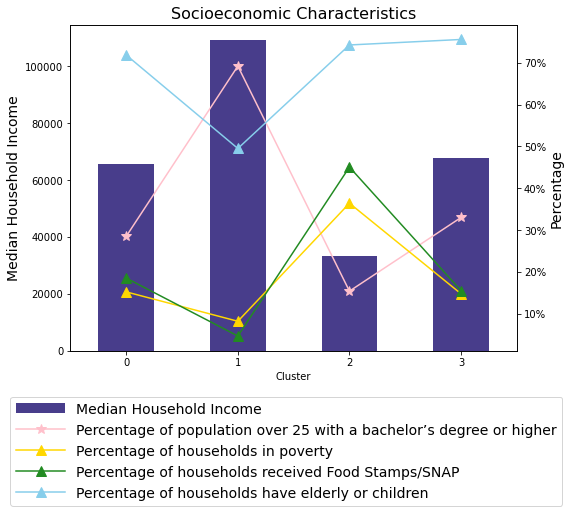

In [133]:
fig, ax = subplots(figsize=(8,6))
ax2=ax.twinx()

br1 = census_cluster['Median Household Income'].plot.bar(color='darkslateblue', ax=ax, label='Median Household Income') #
ax.set_ylabel('Median Household Income', fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.grid(False)

ln1 = ax2.plot(census_cluster['Percent over 25 with a bachelor’s degree or higher'], 
         'b*-', color='pink', markersize=10,
         label='Percentage of population over 25 with a bachelor’s degree or higher')
ln2 = ax2.plot(census_cluster['Percent Households Income in the past 12 months below poverty level'], 
         'b^-', color='gold', markersize=10,
         label='Percentage of households in poverty')
ln3 = ax2.plot(census_cluster['Percent Household received Food Stamps/SNAP'], 
         'b^-', color='forestgreen', markersize=10,
         label='Percentage of households received Food Stamps/SNAP')
ln4 = ax2.plot(census_cluster['Percent Households with one or more people under 18 years']+\
         census_cluster['Percent Households with one or more people 60 years and over'],
         'b^-', color='skyblue', markersize=10,
         label='Percentage of households have elderly or children')

ax2.set_ylabel('Percentage', fontsize=14)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig.legend(bbox_to_anchor=(0.45, -0.25, 0.1, 0.1),
                        ncol=min(4, 1),
                        loc='lower center',
                        bbox_transform=fig.transFigure,
                        fontsize=14,
                        handlelength=3.5)
plt.title("Socioeconomic Characteristics", fontsize=16)

In [90]:
# race composition
rc_col = ['Percent Two races excluding Some other race and three or more races',
          'Percent White alone', 'Percent Black or African American alone',
          'Percent American Indian and Alaska Native alone',
          'Percent Native Hawaiian and Other Pacific Islander alone',
          'Percent Some other race alone', 'Percent Two or more races',
          'Percent Asian alone & Two races including Some other race']
to_names = ['Two races excluding some other race', 'White alone', 'Black or African American alone', 'American Indian and Alaska Native alone',
           'Native Hawaiian and Other Pacific Islander alone', 'Some other race alone', 'Two or more races',
           'Asian alone & Two races including Some other race']
rc = census_cluster[rc_col].rename(columns=dict(zip(rc_col,to_names)))
rc

,Two races excluding Some other race,White alone,Black or African American alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Asian alone & Two races including Some other race
Cluster,,,,,,,,
0,0.018554,0.131150,0.695419,0.002654,0.000787,0.081668,0.026328,0.043439
1,0.032440,0.712701,0.060215,0.001911,0.000309,0.037002,0.038615,0.116806
2,0.024905,0.239980,0.293978,0.007604,0.000815,0.322845,0.040135,0.069737
3,0.021698,0.478588,0.064504,0.003962,0.000394,0.113528,0.033332,0.283995


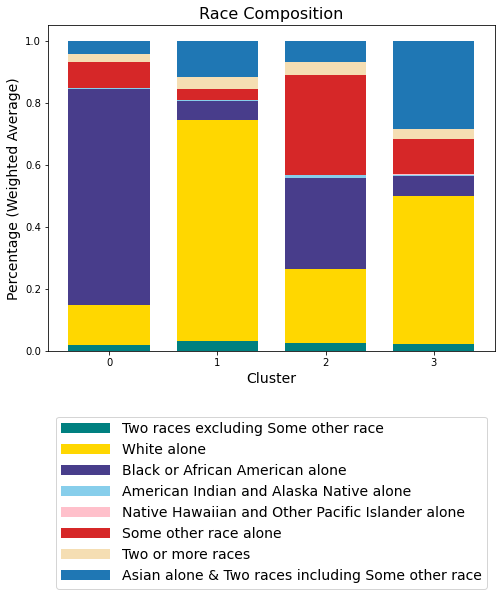

In [140]:
plt.figure(figsize=(8,6))
colors=['teal','gold','darkslateblue','skyblue','pink','tab:red','wheat','tab:blue','tab:purple','gray','brown','seagreen']
for i in range(rc.shape[1]):
    if i == 0:
        plt.bar(rc.index, rc.iloc[:, i], width=0.75, color=colors[i], label=rc.columns[i])
    else:
        plt.bar(rc.index, rc.iloc[:, i], 
          bottom=np.sum(rc.iloc[:, :i], axis=1), width=0.75, color=colors[i], label=rc.columns[i])
plt.xticks(rc.index)
# plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Cluster", fontsize=14)
plt.ylabel('Percentage (Weighted Average)', fontsize=14)
plt.title('Race Composition', fontsize=16)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.75),
                        ncol=min(8,1),
                        fontsize=14,
                        handlelength=3.5)
plt.show()